# 第六次课后练习

**负责助教：王瑞环**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第六次课后练习+姓名+学号.ipynb, 例如 第六次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第六次课后练习+张三+1000000000+#.ipynb</span>

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

In [2]:
import numpy as np

## **0.1** `ndarray`的创建与运算

In [3]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[10], [20]])
print(a + b)

[[11 12 13]
 [24 25 26]]


广播机制，把b广播成[[10,10,10], [20,20,20]]，再逐项相加

In [3]:
a = np.arange(24).reshape(2, 3, 4)
b = np.arange(3).reshape(3, 1)
print(a + b)

[[[ 0  1  2  3]
  [ 5  6  7  8]
  [10 11 12 13]]

 [[12 13 14 15]
  [17 18 19 20]
  [22 23 24 25]]]


a = [[[0,1,2,3],[4,5,6,7],[8,9,10,11]], [[12,13,14,15],[16,17,18,19],[20,21,22,23]]]

b = [[0], [1], [2]]

a+b相当于对a的倒数第二个分量和b的最后一个分量对齐去做，所以把b广播成[[[0,0,0,0],[1,1,1,1],[2,2,2,2]], [[0,0,0,0],[1,1,1,1],[2,2,2,2]]]再相加

In [23]:
a = np.arange(12).reshape(3, 1, 4, 1)
b = np.arange(8).reshape(2, 1, 4)
print((a + b).shape)
print((a + b)[0])

(3, 2, 4, 4)
[[[ 0  1  2  3]
  [ 1  2  3  4]
  [ 2  3  4  5]
  [ 3  4  5  6]]

 [[ 4  5  6  7]
  [ 5  6  7  8]
  [ 6  7  8  9]
  [ 7  8  9 10]]]


```python
a = [ [[[0], [1], [2], [3]]],
      [[[4], [5], [6], [7]]],
      [[[8], [9], [10], [11]]] ]

b = [ [[0, 1, 2, 3]],
      [[4, 5, 6, 7]]]
```
a+b时会广播成:把b变成维数为（1,2,1,4)，然后广播a, b:(3,2,4,4) (每一维取max) 再逐项相加。取[0]就是首个$2*4*4$数组。

因此结果为：
```python
[[[ 0,1,2,3]
  [ 1,2,3,4]
  [ 2,3,4,5]
  [ 3,4,5,6]]
 [[ 4,5,6,7]
  [ 5,6,7,8]
  [ 6,7,8,9]
  [ 7,8,9,10]]]
```



## **0.2** `ndarray`的数据类型

In [24]:
a = np.arange(7, dtype=np.float16)
b1 = np.arange(7, dtype=int)
b2 = np.arange(7, dtype=np.int32)
b3 = np.arange(7, dtype=np.int16)
b4 = np.arange(7, dtype=np.int8)
print((a + b1).dtype)
print((a + b2).dtype)
print((a + b3).dtype)
print((a + b4).dtype)

float64
float64
float32
float16


np.bool_
    ↓
np.int8 → np.int16 → np.int32 → np.int64
    ↓
np.float16 → np.float32 → np.float64
    ↓
np.complex64 → np.complex128

float16+int -> float64;

float16+int32 -> float 64

float16+int16 -> float 32

float16+int8 -> float16


In [25]:
a = np.arange(7, dtype=np.int32)
b1 = np.arange(7, dtype=np.uint16)
b2 = np.arange(7, dtype=np.uint32)
print((a + b1).dtype)
print((a + b2).dtype)

int32
int64


int32+uint16 -> int32

int32+uint32 -> int64

In [26]:
a = np.arange(7, dtype=np.uint8)
print(-a)

[  0 255 254 253 252 251 250]


由于unsigned int 8是0～255，故负数发生溢出，存储为：-1=255, -2=254, ..., -6=250

In [30]:
a = np.arange(7, dtype=np.int8)
print((a * 1000).dtype)
print((a ** 3).dtype)
print(a ** 3)

OverflowError: Python integer 1000 out of bounds for int8

int8是-128～127

第一个越出int8能表示的位数，numpy会自动提升数据类型：int8 * int32 → int32. 因此类型为int32

第二个没超过int8能表示的位数,因此类型为int8, 但是最后6^3=216（仍为8位）发生溢出，遵循补码规则，216 实际存储的值会变成-40。



## **0.3** 沿某个轴的运算

In [32]:
a = np.arange(6).reshape(2, 3)
print(np.sum(a, axis=0))
print(np.min(a, axis=1))
print(np.max(a, axis=0))

[3 5 7]
[0 3]
[3 4 5]


```python
a=[[0, 1, 2], [3, 4, 5]]
```
第一个是对列求sum，变成[3,5,7] (即对第一个axis维度“2行”求和，消掉这一维度)

第二个是对行求min，变成[0, 3] (即对第二个axis维度“3列”求min，消掉这一维度)

第三个是对列求max，变成[3,4,5] (即对第一个axis维度“2行”求min，消掉这一维度)

In [3]:
a = np.array([
    [1, 5, 7],
    [9, 5, 3],
    [7, 9, 7]
])
print(np.argmax(a))
print(np.argmax(a, axis=0))
print(np.argmax(a, axis=1))

3
[1 2 0]
[2 0 1]


np.argmax相当于摊平a后找到a中最大元素对应的下标（取首次出现的）,故为9出现的索引3。

np.argmax(a, axis=0)是对每列求argmax（最大值出现在这一列的哪几行），取首次出现的，故为[1,2,0]（第一列的9，第二列的9，第三列的7）。（相当于消去“行”这一维）

np.argmax(a, axis=1)是对每行求argmax，故为[2,0,1]。（相当于消去“列”这一维）



In [3]:
a = np.arange(6).reshape(1, 2, 3)
print(np.mean(a))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))
print(np.mean(a, axis=(0, 1)))
print(np.mean(a, axis=(0, 2), keepdims=True))

2.5
[[0. 1. 2.]
 [3. 4. 5.]]
[[1.5 2.5 3.5]]
[1.5 2.5 3.5]
[[[1.]
  [4.]]]


a = [ [[0,1,2], 
       [3,4,5]]
    ]

mean是求均值。

np.mean(a)是摊平了求均值，为2.5

np.mean(a, axis=0)是消去1批次这一维度，对每个批次求均值。由于只有一行，故为[[0,1,2], [3,4,5]]这个$2*3$矩阵(均值是float)

np.mean(a, axis=1)是消去2行这一维度，对每个行求均值。故为[[1.5, 2.5, 3.5]]这个$1*3$矩阵 (0+3/2, 1+4/2, 2+5/2)

np.mean(a, axis=(0, 1))是消去1批次和2行这两个维度。对每个批次和每个行求均值（即对3列中的每一列，求这一列中全部数的均值），故为[1.5 2.5 3.5]这个（3，）矩阵

print(np.mean(a, axis=(0, 2), keepdims=True))是消去1批次和3列这两个维度。对每个批次和每个列求均值（即对2行中的每一行，求这一行中全部数的均值）。又要求保持维数。故为[[[1],[4]]]这个$1*2*1$矩阵(维数不变，而2行仍作为行参数，剩下维度补1)

## **0.4** 形状操作

In [ ]:
a = np.arange(6)
a.resize(2, 3)
print(a.shape)
a.reshape(3, 2)
print(a.shape)
a = a.reshape(3, 2)
print(a.shape)
a = a.reshape(-1, 3)
print(a.shape)
print(a)
a = a.T 
print(a.shape)
a = a.reshape(1, 3, -1).T
print(a.shape)
print(a)
a = a.transpose(1, 0, 2)
print(a.shape)
a = a.squeeze()
print(a.shape)
print(a)

```python
(2, 3) 因为resize会改变a的形状. a.resize(2, 3) 等价于 a = np.resize(a, (2, 3))

(2, 3) reshape只是视图，不会改变a的自身数据和形状，因此仍为(2, 3)

(3, 2) 这里赋值给a了，因此a的形状变成(3, 2)

(2, 3) -1表示要自行计算出来的，这里相当于(6/3, 3) = (2, 3)。

[[0 1 2] 

 [3 4 5]] a数组形状

(3, 2) a变成自身的转置

(2, 3, 1) -1自行计算出是6 / 1 / 3 = 2，1*3*2求转置后变成2*3*1 且原数组的[i][j][k]变成[k][j][i],因此得到下面输出。

[[[0]

  [1]

  [2]]

 [[3]

  [4]

  [5]]]

(3, 2, 1) transpose(1, 0, 2)是指改变轴的顺序为 (1, 0, 2)，因此原来的2*3*1变成新的3*2*1。原数组的[i][j][k]变成[j][i][k]

(3, 2) squeeze从给定数组的形状中删除所有一维的条目

[[0 3]

 [1 4]

 [2 5]] 输出是转置后显然的。
```

## **0.5** `numpy.dot`

`numpy.dot`的运算方式随输入的`ndarray`的形状而不同，请参阅[文档](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)完成本题

In [4]:
a = np.arange(30)
b = np.arange(30)
d = np.dot(a, b)
print(a.shape, b.shape, d.shape, (a@b).shape)
assert(np.inner(a, b) == d)

(30,) (30,) () ()


a和b的形状显然。d为a和b的内积，没有维度。由于a和b都是一维，此时这里的a@b相当于a和b的内积。

In [16]:
a = np.arange(30).reshape(-1, 5)
b = np.arange(30).reshape(5, -1)
d = np.dot(a, b)
print(a.shape, b.shape, d.shape, (a@b).shape)
assert np.allclose(np.matmul(a, b), d)

(6, 5) (5, 6) (6, 6) (6, 6)


a是$6*5$的，b是$5*6$的。d与a@b都是矩阵乘法，是$6*6$的

In [18]:
a = np.arange(30).reshape(-1, 5)
b = np.arange(30).reshape(5, -1)
b = b[..., 0]
d = np.dot(a, b)
print(a.shape, b.shape, d.shape, (a@b).shape)

(6, 5) (5,) (6,) (6,)


a是$6*5$的，b是$5*6$的。然后的切片是取出b的第一列的全体，b变成了$(5,)$的（一维）。然后dot和a@b都是矩阵乘法，变成$(6,)$的。

注意如果改成
```python
b = b[..., [0]]
```
那么结果为：b变成了$(5,1)$的（二维）。然后dot和a@b都是矩阵乘法，变成$(6,1)$的。

In [20]:
a = np.arange(30).reshape(2, -1, 5)
b = np.arange(30).reshape(2, 5, -1)
d = np.dot(a, b)
print(a.shape, b.shape, d.shape, (a@b).shape)

(2, 3, 5) (2, 5, 3) (2, 3, 2, 3) (2, 3, 3)


a是$2*3*5$的，b是$2*5*3$的。然后dot是矩阵乘法的类比：数组a的最后一维上的所有元素与数组b的倒数第二位上的所有元素的乘积和
```python
dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
```
得到$2*3*2*3$的数组（消去这两个5）

而 a@b 对两个三维数组进行操作时，会按照批次（第一维度不变）进行矩阵乘法。也就是说，它会在最后一个维度上执行矩阵乘法，同时保持前面的维度不变。

因此a是(2,3,5),b是(2,5,3)。保持批次2不变，[$3*5$]矩阵和[$5*3$]矩阵做矩阵乘法，得到[$3*3$].因此结果为[$2*3*3$]的矩阵

# 第一部分 代码填空

In [4]:
import numpy as np

## **1.1** 矩阵创建与运算

**Step 1.** **依次**创建矩阵$A,B$，元素服从标准正态分布，其中$A$的大小为$20\times 40$，$B$的大小为$40\times 40$

**Step 2.** 分别计算$2A,AA^\top,AB$的结果

**Step 3.** 写一个函数，对于输入的参数$\lambda$，计算$A(B-\lambda I)$

In [22]:
np.random.seed(1)

########################
## TODO: Create A and B
A = np.random.randn(20, 40) # randn: standard Gaussian; random.rand: Uniform
B = np.random.randn(40, 40)
########################
assert abs(A[0][0] - 1.6243453636632417) < 1e-6
assert abs(B[0][0] - 0.8143431291489254) < 1e-6

########################
## TODO: Calculate 2A, AA^T, AB, respectively
mat1 = 2 * A
mat2 = A @ A.T
mat3 = A @ B
########################
assert abs(mat1[0][0] - 3.2486907273264833) < 1e-6
assert abs(mat2[0][0] - 37.539142010534164) < 1e-6
assert abs(mat3[0][0] + 2.9652640280215974) < 1e-6

########################
## TODO: Calculate A(B-lam*I)
def func(lam):
    return A @ (B - lam * np.eye(40, 40))
########################
assert abs(func(0)[0][0] + 2.9652640280215974) < 1e-6
assert abs(func(1)[0][0] + 4.589609391684836) < 1e-6

## **1.2** 线性方程组

使用`numpy`求解以下线性方程组的解（已知系数矩阵是可逆的）
$$
\left\{\begin{aligned}
2 x_{1}+x_{2}+x_{3} &=5 \\
3 x_{1}+2 x_{2}+ 2 x_{3} &=8 \\
x_{2}+2 x_{3} &=2
\end{aligned}\right.
$$

In [ ]:
# TODO: Solve the linear system Ax = b using numpy
import numpy as np
A = np.array([[2, 1, 1], [3, 2, 2], [0, 1, 2]])
b = np.array([5, 8, 2]).reshape(3, 1)
print(np.linalg.inv(A) @ b)

[ 2.00000000e+00 -1.33226763e-15  1.00000000e+00]


## **1.3** K-Means 聚类

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time

### **1.3.1** 生成初始数据

请使用`np.random.choice`在$N$个数据点中随机选择$K$个**不重复**的作为初始质心，由于随机种子已经定好，如果你的实现正确，初始质心位置应当与示例图中一致

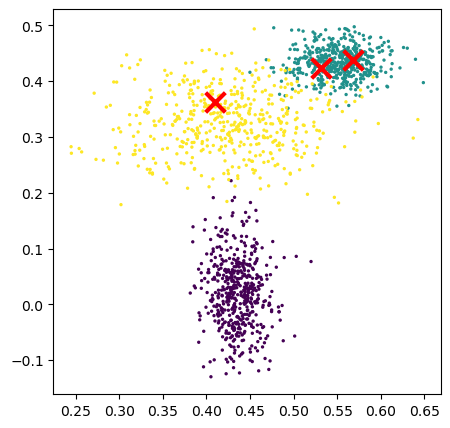

In [31]:
def get_data_centroids(N=1500, K=3):
    NN = N // K
    np.random.seed(2)
    mean = np.random.rand(K, 2)
    std = np.random.rand(K, 2) * 0.1
    X = np.zeros((NN * K, 2))
    for i in range(K):
        X[i * NN:(i + 1) * NN, :] = np.random.randn(NN, 2) * std[i:i+1] + mean[i:i+1]
    labels = np.zeros(NN * K, dtype=int)
    for i in range(K):
        labels[i * NN:(i + 1) * NN] = i
        
    ################################################
    # TODO: randomly choose K centroids
    centroids = X[np.random.choice(N, K, replace = False)] # 无放回摸球
    ################################################
    
    return X, centroids, labels


X, centroids, labels = get_data_centroids()
assert X.shape == (1500, 2)
assert centroids.shape == (3, 2)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', 
            s=200, linewidths=3, color='r')
plt.show()

### **1.3.2** 更新质心

**Step 1.** 实现计算距离的函数`compute_distance`，接受两个`ndarray`作为输入，形状分别为`(P,2),(Q,2)`，计算他们两两之间的欧氏距离，返回一个大小为`(P,Q)`的矩阵

在函数中，请不要使用`for`或者`while`循环

In [26]:
################################################
# TODO: implement the function to compute the distance between two sets of points
def compute_distance(points1, points2):
    points1 = points1[:, np.newaxis, :] # P,1,2
    points2 = points2[np.newaxis, :, :] # 1,Q,2
    return np.sqrt(np.sum((points1 - points2) ** 2, axis = 2)) # p1-p2 广播成 P,Q,2 # (i,j,2) = (i,1,2) - (1,j,2)
################################################

points1 = np.array([[1, 2], [3, 4]])
points2 = np.array([[5, 6], [7, 8], [9, 10]])
distances = compute_distance(points1, points2)
assert distances.shape == (2, 3)
assert np.allclose(distances, [[5.65685425, 8.48528137, 11.3137085],
                                [2.82842712, 5.65685425, 8.48528137]])

**Step 2.** 实现寻找离每个点最近的质心`assign_clusters`，输入为一个大小为`(N,K)`的矩阵，表示`N`个点到`K`个当前质心的距离，返回值是一个大小为`(N,)`的向量，表示每一个点距离最近的质心是第几个

在函数中，请不要使用`for`或者`while`循环

In [27]:
################################################
# TODO: implement the function to assign each point to the nearest centroid
def assign_clusters(distances):
    return np.argmin(distances, axis = 1)
################################################
distances = np.array([
    [1, 2],
    [3, 1],
    [2, 0],
]) # N * k matrix
clusters = assign_clusters(distances)
assert clusters.shape == (3,)
assert np.allclose(clusters, [0, 1, 1])

**Step 3.** 实现基于数据点和当前质心，更新质心位置的函数`update_centroids`，每一个新的质心位置等于到原来质心最近的所有点的质心，函数输入是形状为`(N, 2)`的数据点`X`和形状为`(K,2)`的原来质心位置`centroids`，返回值是形状为`(K,2)`的新质心位置

函数中最多允许出现一次`for`或`while`循环，你也可以尝试不使用循环实现这个功能

由于生成数据的随机数种子是固定的，如果你的实现正确，更新一步后的质心位置应该与示例图一致

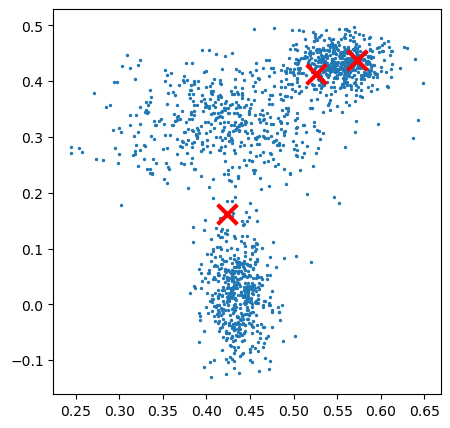

In [41]:
################################################
# TODO: implement the function to update the centroids
def update_centroids(X, centroids):
    distance = compute_distance(X, centroids)
    cluster = assign_clusters(distance) # (N, )
    new_one = np.zeros_like(centroids) # (K, 2)
    for i in range(centroids.shape[0]): new_one[i, :] = np.mean(X[cluster == i], axis = 0) # 对x和y分别取均值就是新的质心
    return new_one

################################################

X, centroids, labels = get_data_centroids()
new_centroids = update_centroids(X, centroids)

assert new_centroids.shape == centroids.shape
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], 
            marker='x', s=200, linewidths=3, color='r')
plt.show()

### **1.3.3** K-Means 迭代更新

实现`kmeans`函数，输入为形状为`(N,2)`的数据点`X`，形状为`(K,2)`的起始质心位置`init_centroids`，质心位置更新迭代的次数`max_iters`，返回值包括
- 一个形状为`(N,)`的向量，表示每一个点距离最近的质心是第几个
- 迭代完成后的最终质心位置
  
由于生成数据的随机数种子是固定的，如果你的实现正确，聚类效果应该与示例图一致

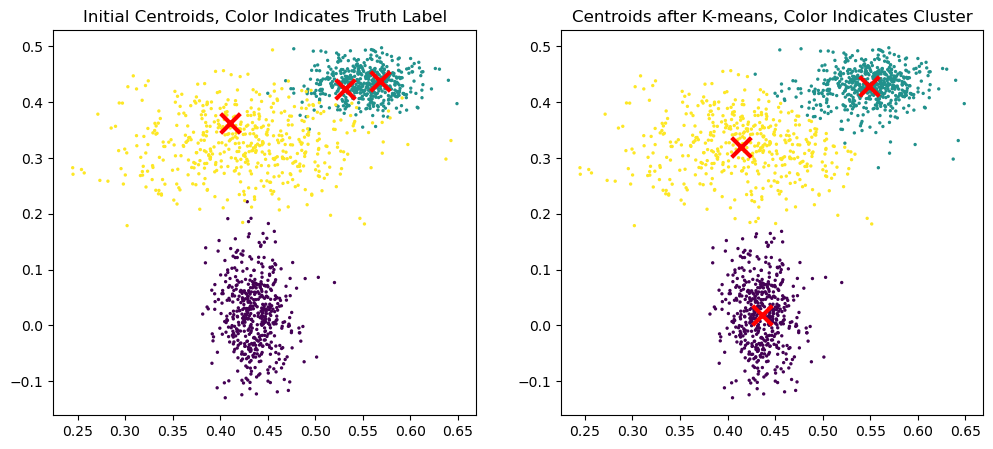

In [ ]:
################################################
# TODO: implement the k-means algorithm
def kmeans(X, init_centroids, max_iters=100):
    centroids = init_centroids
    for __ in range(max_iters):
        distance = compute_distance(X, centroids)
        clusters = assign_clusters(distance) # 无奈重新计算一次
        new_one = update_centroids(X, centroids)
        if np.allclose(centroids, new_one): break
        centroids = new_one
    return clusters, centroids
################################################

X, centroids, labels = get_data_centroids()
clusters, new_centroids = kmeans(X, centroids)
assert clusters.shape == labels.shape
assert new_centroids.shape == centroids.shape

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='x', s=200, linewidths=3, color='r')
plt.title('Initial Centroids, Color Indicates Truth Label')
plt.subplot(1, 2, 2)

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=2)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], 
            marker='x', s=200, linewidths=3, color='r')
plt.title('Centroids after K-means, Color Indicates Cluster')
plt.show()

### **1.3.4** 聚类指标

利用真实标签`labels`和聚类标签`clusters`计算此次聚类的纯度和F1值

不限制显式循环的使用，但请尽量尝试多用`numpy`的向量化操作，减少显式循环的次数

In [ ]:
def calc_purity(labels, clusters):
    '''input shape both are (N,)'''
    N = labels.shape[0]; K = np.max(clusters) + 1 # shape永远是一个tuple
    tot = 0
    for r in range(K):
        # _, indices = np.unique(labels[np.where(clusters == r)[0]], return_counts = True)
        indices = np.bincount(labels[np.where(clusters == r)[0]]) # bincount: 统计每个类的数量 # 返回一个数组，索引是类标签，值是数量
        tot += np.max(indices)
    return tot / N
    # num = np.zeros((K, K))
    # for i in range(N): num[clusters[i]][labels[i]] += 1 # 预定义类labels，实际分配到clusters
    # return np.sum(np.max(num, axis = 1)) / N

purity = calc_purity(labels, clusters)
print(purity)
assert 0.96 < purity < 0.97

0.9613333333333334


In [ ]:
def calc_f1_score(labels, clusters):
    '''input shape both are (N,)'''
    N = labels.shape[0]; K = np.max(labels) + 1
    num = np.zeros((K, K))
    for i in range(N): num[clusters[i], labels[i]] += 1
    True_Positive = np.max(num, axis = 0)
    precision = True_Positive / np.sum(num, axis = 0)
    recall = True_Positive / np.sum(num, axis = 1)
    return np.mean(2 * precision * recall / (precision + recall))

f1_score = calc_f1_score(labels, clusters)
print(f1_score)
assert 0.96 < f1_score < 0.97

0.9612500216719634
